# Aditya Astonkar

# Task 3:Exploratory Data Analysis - Retail(SampleSuperstore)

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Read dataset
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#check no of coloumns and row
df.shape

(9994, 13)

In [5]:
#check info of our dataset 'data types'(float,object,int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#describe the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#drop the columns 
df.drop(['Postal Code'],axis=1,inplace=True)

In [8]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# check null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
#check duplicates
duplicate=df.duplicated()
duplicate.sum()

50

In [11]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
duplicate=df.duplicated()
duplicate.sum()

0

# Defining correlation between numerical columns

In [13]:
corr=df.corr()

<AxesSubplot:>

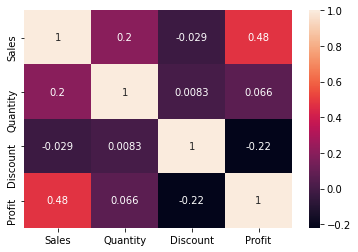

In [14]:
sns.heatmap(corr,annot=True)

Discount vs profit

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

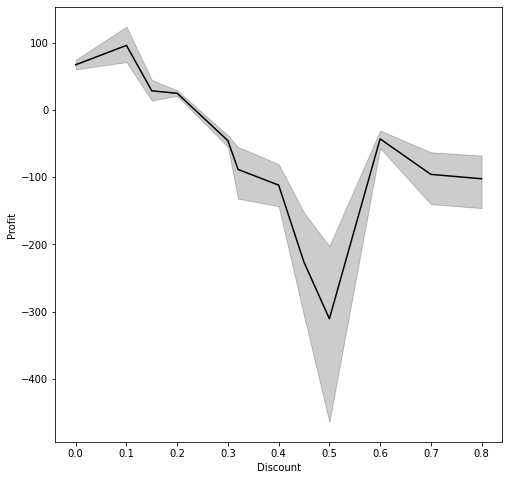

In [15]:
#discount vs profit
plt.figure(figsize=(8,8))
sns.lineplot(x='Discount',y='Profit',color='black',data=df)

Quantity vs Profit

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

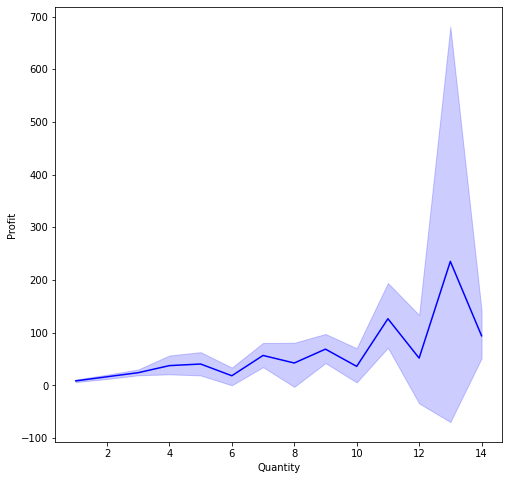

In [16]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Quantity',y='Profit',color='blue',data=df)

comparing sales by state

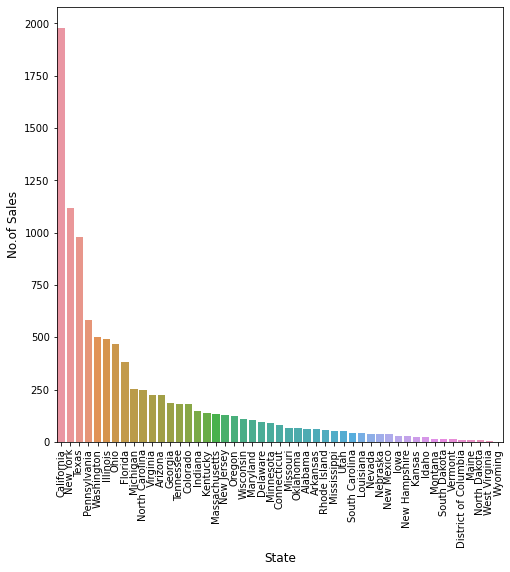

In [17]:
plt.figure(figsize=(8,8))
chart=sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
chart.set_xlabel('State',fontsize=12)
chart.set_ylabel('No.of Sales',fontsize=12)
plt.show()

Category according to sales

In [30]:
pie=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
pie

Category
Technology         835774.6410
Furniture          740568.6663
Office Supplies    718256.0700
Name: Sales, dtype: float64

ploting Category according to sales

Text(0.5, 1.0, 'Category according to sales')

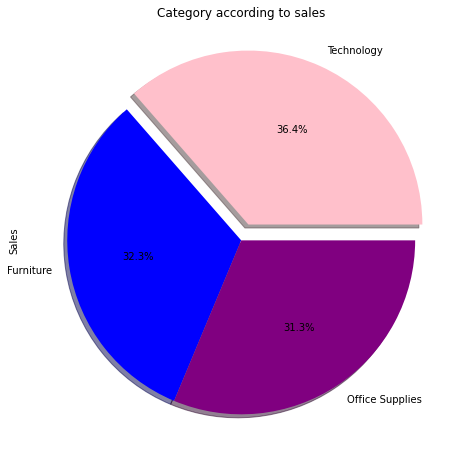

In [33]:
plt.figure(figsize=(8,8))
explode=(0.1,0.0,0.0)
color=['pink','blue','purple']
pie.plot.pie(autopct='%1.1f%%',explode=explode,colors=color,shadow=True)
plt.title('Category according to sales')

ploting relation between all objects

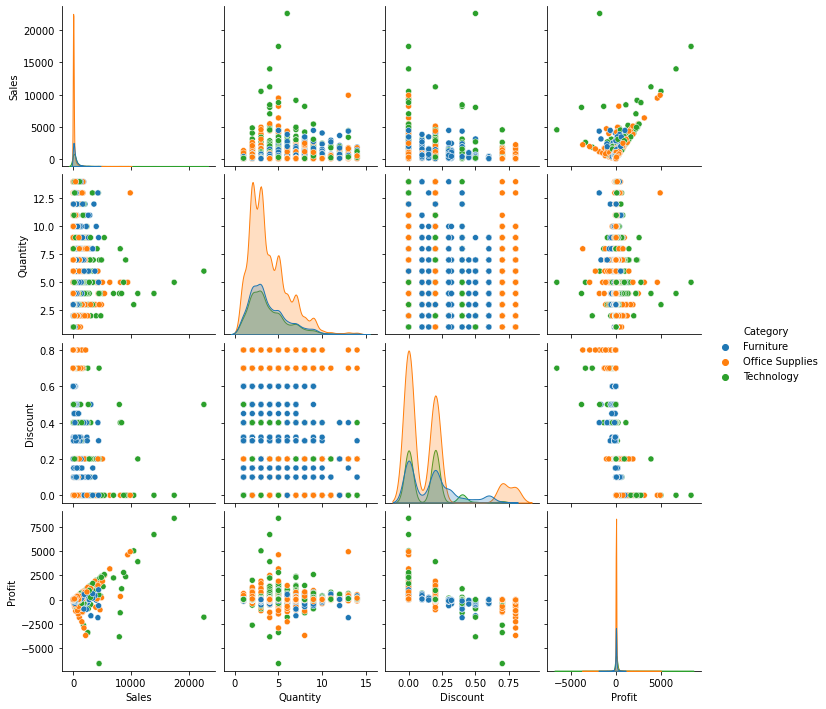

In [34]:
sns.pairplot(df,hue='Category',diag_kind='kde')

ploting different between profit and loss

In [36]:
df_loss=df[df['Profit']<0]
df_profit=df[df['Profit']>0]

ploting profit chart

Text(0, 0.5, 'Nagative Profit')

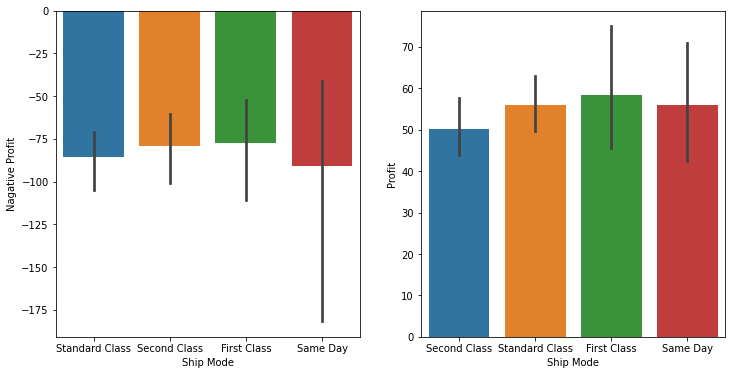

In [49]:
plt.figure(figsize=(12,6))
ax=plt.subplot(122)
sns.barplot(x='Ship Mode',y='Profit',data=df_profit)
ax=plt.subplot(121)
sns.barplot(x='Ship Mode',y='Profit',data=df_loss)
plt.ylabel('Nagative Profit')

groupby sub-category and profit

In [50]:
x=df_profit.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
x

Sub-Category
Binders        68704.5319
Copiers        55617.8249
Phones         52023.6759
Accessories    42851.5317
Chairs         36435.9103
Paper          33830.0381
Machines       33503.4251
Storage        27705.1302
Appliances     26767.6466
Furnishings    19532.9668
Tables         14686.6672
Bookcases       8679.6500
Envelopes       6964.1767
Art             6511.8388
Labels          5499.1558
Supplies        1826.5224
Fasteners        982.7134
Name: Profit, dtype: float64

ploting profit according to sub-category

Text(0.5, 1.0, ' profit according to sub-category')

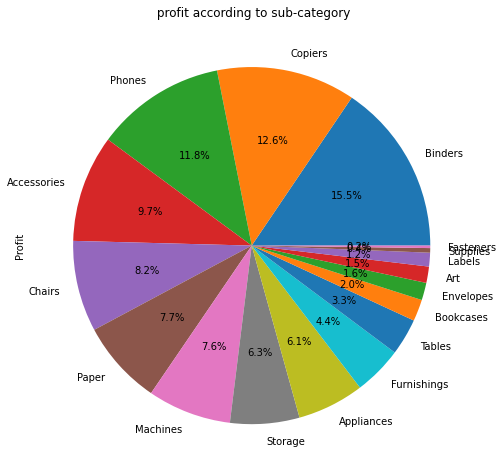

In [72]:
plt.figure(figsize=(8,15))
x.plot.pie(autopct='%1.1f%%')
plt.title(' profit according to sub-category')

comparesion between sales & profit

<AxesSubplot:xlabel='Segment'>

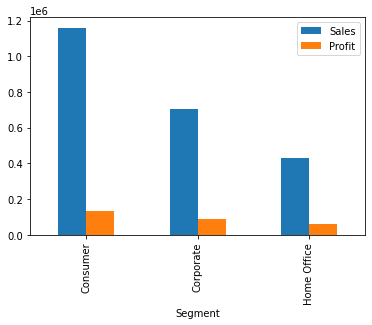

In [52]:
y=df.groupby('Segment')[['Sales','Profit']].sum()
y.plot.bar()